In [2]:
import torch

import matplotlib.pyplot as plt
plt.style.use('./pptnqfe.mplstyle')

from qulearn.hat_basis import HatBasis
from qulearn.qlayer import HatBasisQFE

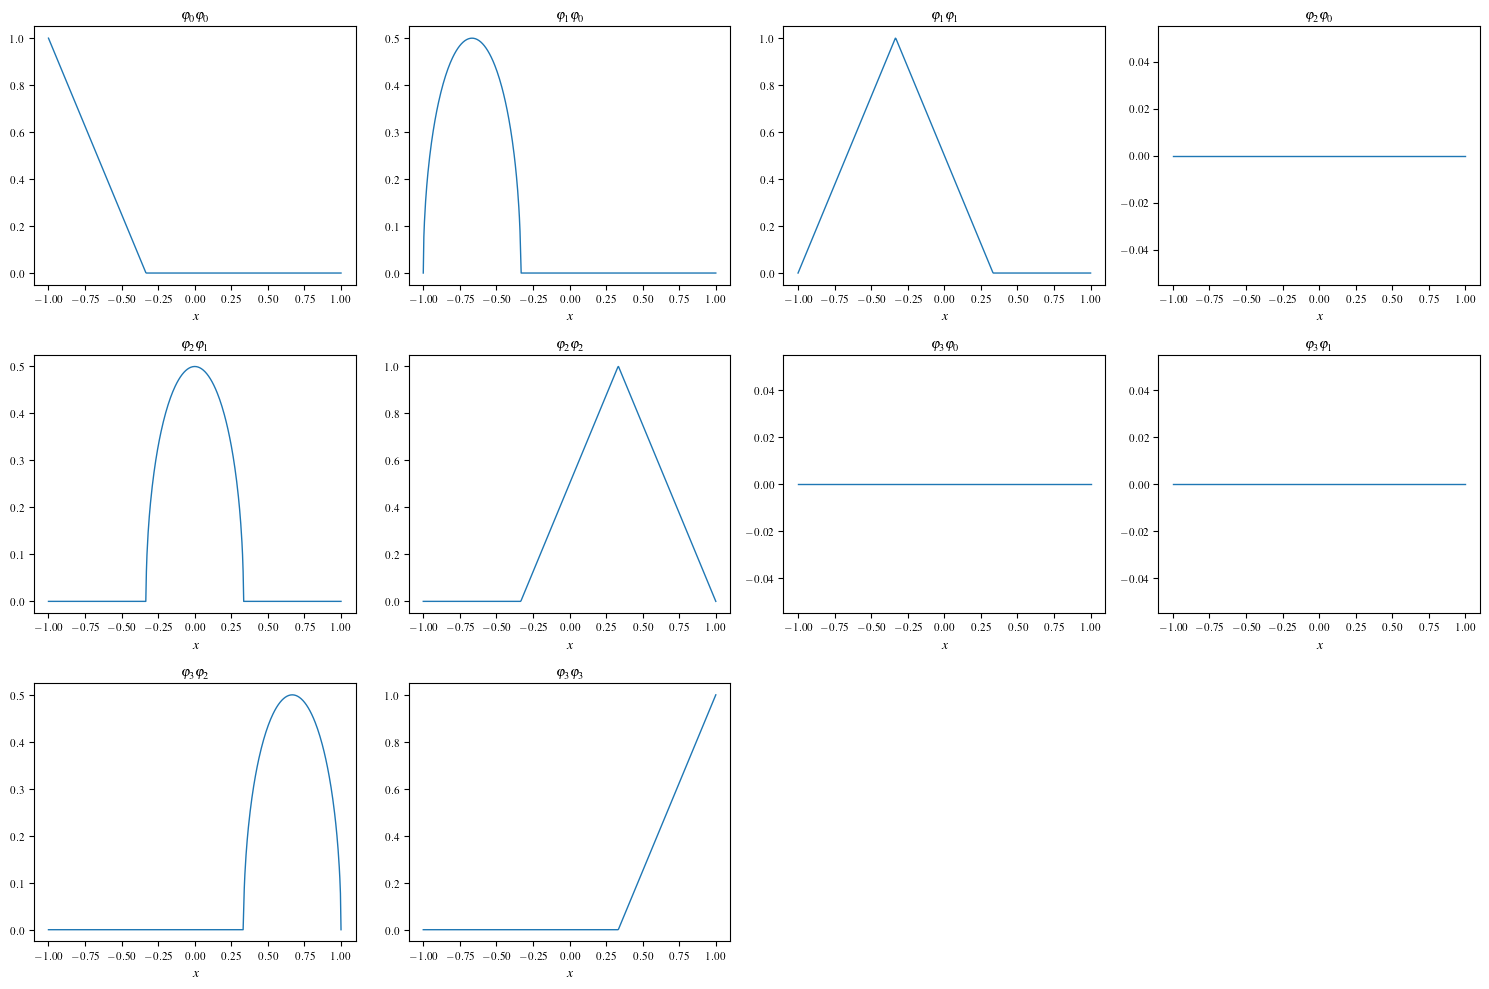

In [9]:
num_qubits = 2
num_nodes = 2**num_qubits
a = -1.0
b = 1.0
hat_basis = HatBasis(a=a, b=b, num_nodes=num_nodes)

num_pnts = 500
xvals = torch.linspace(-1.0, 1.0, num_pnts)
basis_vectors = hat_basis.eval_basis_vector(xvals)
basis_vectors = torch.sqrt(basis_vectors)

num_subplots = num_nodes * (num_nodes + 1) // 2  # n(n+1)/2 formula for sum of first n integers
fig, axs = plt.subplots(3, 4, figsize=(15, 10))  # Adjusted for 12 slots, 2 will be empty
axs_flat = axs.flatten()

subplot_idx = 0
for i in range(num_nodes):
    for j in range(i + 1):
        axs_flat[subplot_idx].plot(xvals, basis_vectors[:, i] * basis_vectors[:, j])
        axs_flat[subplot_idx].set_title(f'$\\varphi_{i}\\varphi_{j}$')
        axs_flat[subplot_idx].set_xlabel('$x$')
        subplot_idx += 1

for idx in range(subplot_idx, len(axs_flat)):
    fig.delaxes(axs_flat[idx])

plt.tight_layout()
plt.savefig('./figures/basis_funcs.pdf', format='pdf', bbox_inches='tight')
plt.show()